# Week 4 demo/quiz
Let's talk categorization! In particular, let's see how a formal simulation of the exemplar model provides a very simple yet unintuitive prediction. 

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import seaborn as sn

In the Mack et al. (2013) study, participants learned to categorize simple visual objects into one of two categories. The objects were composed of four different dimensions (size, color, shape, position), each of which had two values. The categories were structured such that there are 5 objects in category A and 4 in category B:

![objects](https://dl.dropboxusercontent.com/s/331ax1b36mpup6q/objects.png)

These different feature values along the four dimensions can be represented as a binary variable. By doing so, each object is defined by a vector of four values. For example, a small, green, circle, on the left is defined as [1,1,1,1]. A large, red, triangle, on the right is defined as [0,0,0,0]. All of the nine objects are defined in this way below:

In [2]:
catA = np.array([[0.5,1],[1,0.5],[1,1.5],[1.5,1]])
protoA = np.array([1,1])
catB = np.array([[1.5,2],[2,1.5],[2,2.5],[2.5,2]])
protoB = np.array([2,2])
items = np.append(catA,catB,axis=0)

## Exemplar model's summed similarity
Let's fit the exemplar model to this data! The exemplar model makes a category decision by first calculating the summed similarity between a test object and the category exemplars. Summed similarity is based on Shepard's exponential generalization function and requires computing the distance between the test item and each category exemplar, summing these distances, and computing similarity with the exponential function. One important thing to note is that the exemplar model assumes we selectively attend to the stimulus dimensions that are most informative for making a category decision. This is modeled as a set of weights on the stimulus dimensions and is defined in the formula as the `w` parameter. Here's the formula for summed similarity between a test item `i` and category A:

![summed similarity](https://dl.dropboxusercontent.com/s/8hphlyff2o426by/ss.png)

Below is defined a function that calculates summed similarity between a test object (`item`) and exemplars from a category (`catitems`) given a set of parameters (attention weights `w`, distance power value `r`, and exponential scaling parameter `c`). This function is intact (i.e., no code for you to add) and we will use this later in an exemplar model function. But, before that, let's see how the summed similarity function works.

In [4]:
def summed_similarity(w,r,c,item,catitems):
    distances = np.sum(np.array(w*[np.abs(item-x)**r for x in catitems]),axis=1)**(1/r)
    similarities = np.exp(-c*distances)
    ss = np.sum(similarities)
    return(ss)

First, let's see what the summed similarity is between the object defined by [0,0,0,0] and the category A exemplars. We will assume the attention weights are equal across all the dimensions and `c` is equal to 1. Given the dimensions of these stimuli, what should `r` be set to (remember, `r=1` gives a city block distance, `r=2` gives a Euclidean distance)?

In [9]:
w = np.array([1,1])
r = 2
c = 1
ssA = summed_similarity(w,r,c,[1,1],protoA)
print(ssA)

2.0


The result above should be approximately 1.6068. If not, check how you set the `r` parameter. 

Now, calculate the summed similarity between the same object and the category B exemplars with the same parameters:

In [27]:
ssB = summed_similarity(w,r,c,testobject,catB) #??
print ssB

0.33877327373


Which category is the test object more similar to? Double click on this cell to make it editable, then add your answer below.

** Provide your answer here: 

The above calculations assume that all dimensions receive the same attention (i.e., they are given the same weight). Try downweighting different dimensions (e.g., setting `w` equal to `np.array([0,1,1,1])` removes all attention from dimension 1 in the summed similarity calculations) to see if you can maximize the summed similarity between the test object and category A and minimize summed similarity to category B:

In [1]:
w = np.array([1,1,1,1])
ssA = summed_similarity(w,r,c,testobject,catA)
ssB = ?? # fill in from above
print ssA, ssB

SyntaxError: invalid syntax (<ipython-input-1-84dd48adc339>, line 3)

## Predicting response probabilities with the exemplar model
In the exemplar model, the probability of making a category response depends on a ratio of the summed similarity to that category and the total summed similarity to all categories. Here's the formula:

![probability of 'A'](https://dl.dropboxusercontent.com/s/oje1nwd2v7r237h/probA.png)

Below, we need to fill in code in the `exemplar_model` function to get these response probability predictions. 

In [6]:
def exemplar_model(w,r,c,items,catA,catB):
    # attention weights to the four dimensions should sum to 1
    w = w/sum(w)
    
    # power value in distance calculation: 1 = city block, 2 = Euclidean
    r = 1 # given the dimensions of the objects, what should this be???
    
    # loop through each study item to get the exemplar model prediction
    probA = np.array([])
    for item in items:
        
        # calculate summed similarity between item and category A exemplars
        ssA = summed_similarity(w,r,c,item,catA) #??
        # calculate summed similarity between item and category B exemplars
        ssB = summed_similarity(w,r,c,item,catB) #??
        # calculate the probability of making an 'A' category response
        pA = ssA/(ssA+ssB) #??

        # store the result
        probA = np.append(probA,pA)
        
    return probA

In [7]:
w = np.array([1,1,0,1])
c = 4
r = 1 #?? 

In [9]:
pred_prob = exemplar_model(w,r,c,studyitems,catA,catB)
print pred_prob

[ 0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556]


In [10]:
def exemplar_model_fitting(parameters):
    w = np.array([parameters[0],parameters[1],parameters[2],parameters[3]])
    c = parameters[4]
    r = 1
    probA = exemplar_model(w,r,c,studyitems,catA,catB)
    sse = np.sum((obs_prob-probA)**2)**0.5
    return sse

In [13]:
import scipy
scipy.optimize.minimize(exemplar_model_fitting,parameters)
fitresult = sp.optimize.minimize(exemplar_model_fitting,parameters)

AttributeError: 'module' object has no attribute 'optimize'

In [294]:
pred_prob = exemplar_model(fitresult.x,studyitems,catA,catB)

In [295]:
pred_prob

array([ 0.79890107,  0.86189709,  0.82438152,  0.94737339,  0.78226414,
        0.33431939,  0.26022669,  0.1944971 ,  0.07039132])

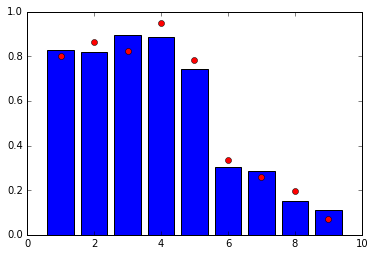

In [296]:
x = np.arange(1,10)
width = 0.8
plt.bar(x-0.4,obs_prob)
plt.plot(x,pred_prob,'ro')

In [287]:
fitresult.x

array([ 1.37365952,  1.01305954,  0.39714224,  1.34183837,  5.6472406 ,
        1.15      ])